In [124]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib


In [16]:
df = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/formart_house.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21.0,396.9,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.9,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crim     507 non-null    object
 1   zn       507 non-null    object
 2   indus    507 non-null    object
 3   chas     507 non-null    object
 4   nox      507 non-null    object
 5   rm       507 non-null    object
 6   age      507 non-null    object
 7   dis      507 non-null    object
 8   rad      507 non-null    object
 9   tax      507 non-null    object
 10  ptratio  507 non-null    object
 11  b        507 non-null    object
 12  lstat    507 non-null    object
 13  medv     507 non-null    object
dtypes: object(14)
memory usage: 55.6+ KB


### Sistemazione dataset 

Bisogna eliminare l'ultima riga e rinominare la colonna "medv" in "price"


In [40]:
new_lenngth = df.index.argmax() # ritorna 506 che è l'indice massimo quindi il num righe - 1
new_lenngth
data = df.rename(columns={"medv": "price"}).iloc[0:new_lenngth]
# df.iloc[0:new_lenngth]

data = data.astype("float64")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: >

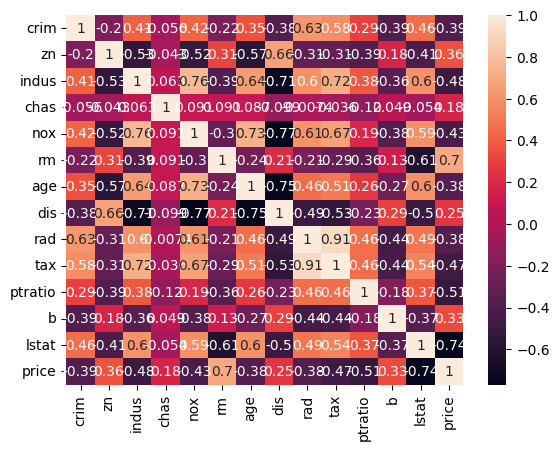

In [44]:
data.corr()
sns.heatmap(data.corr(), annot=True)


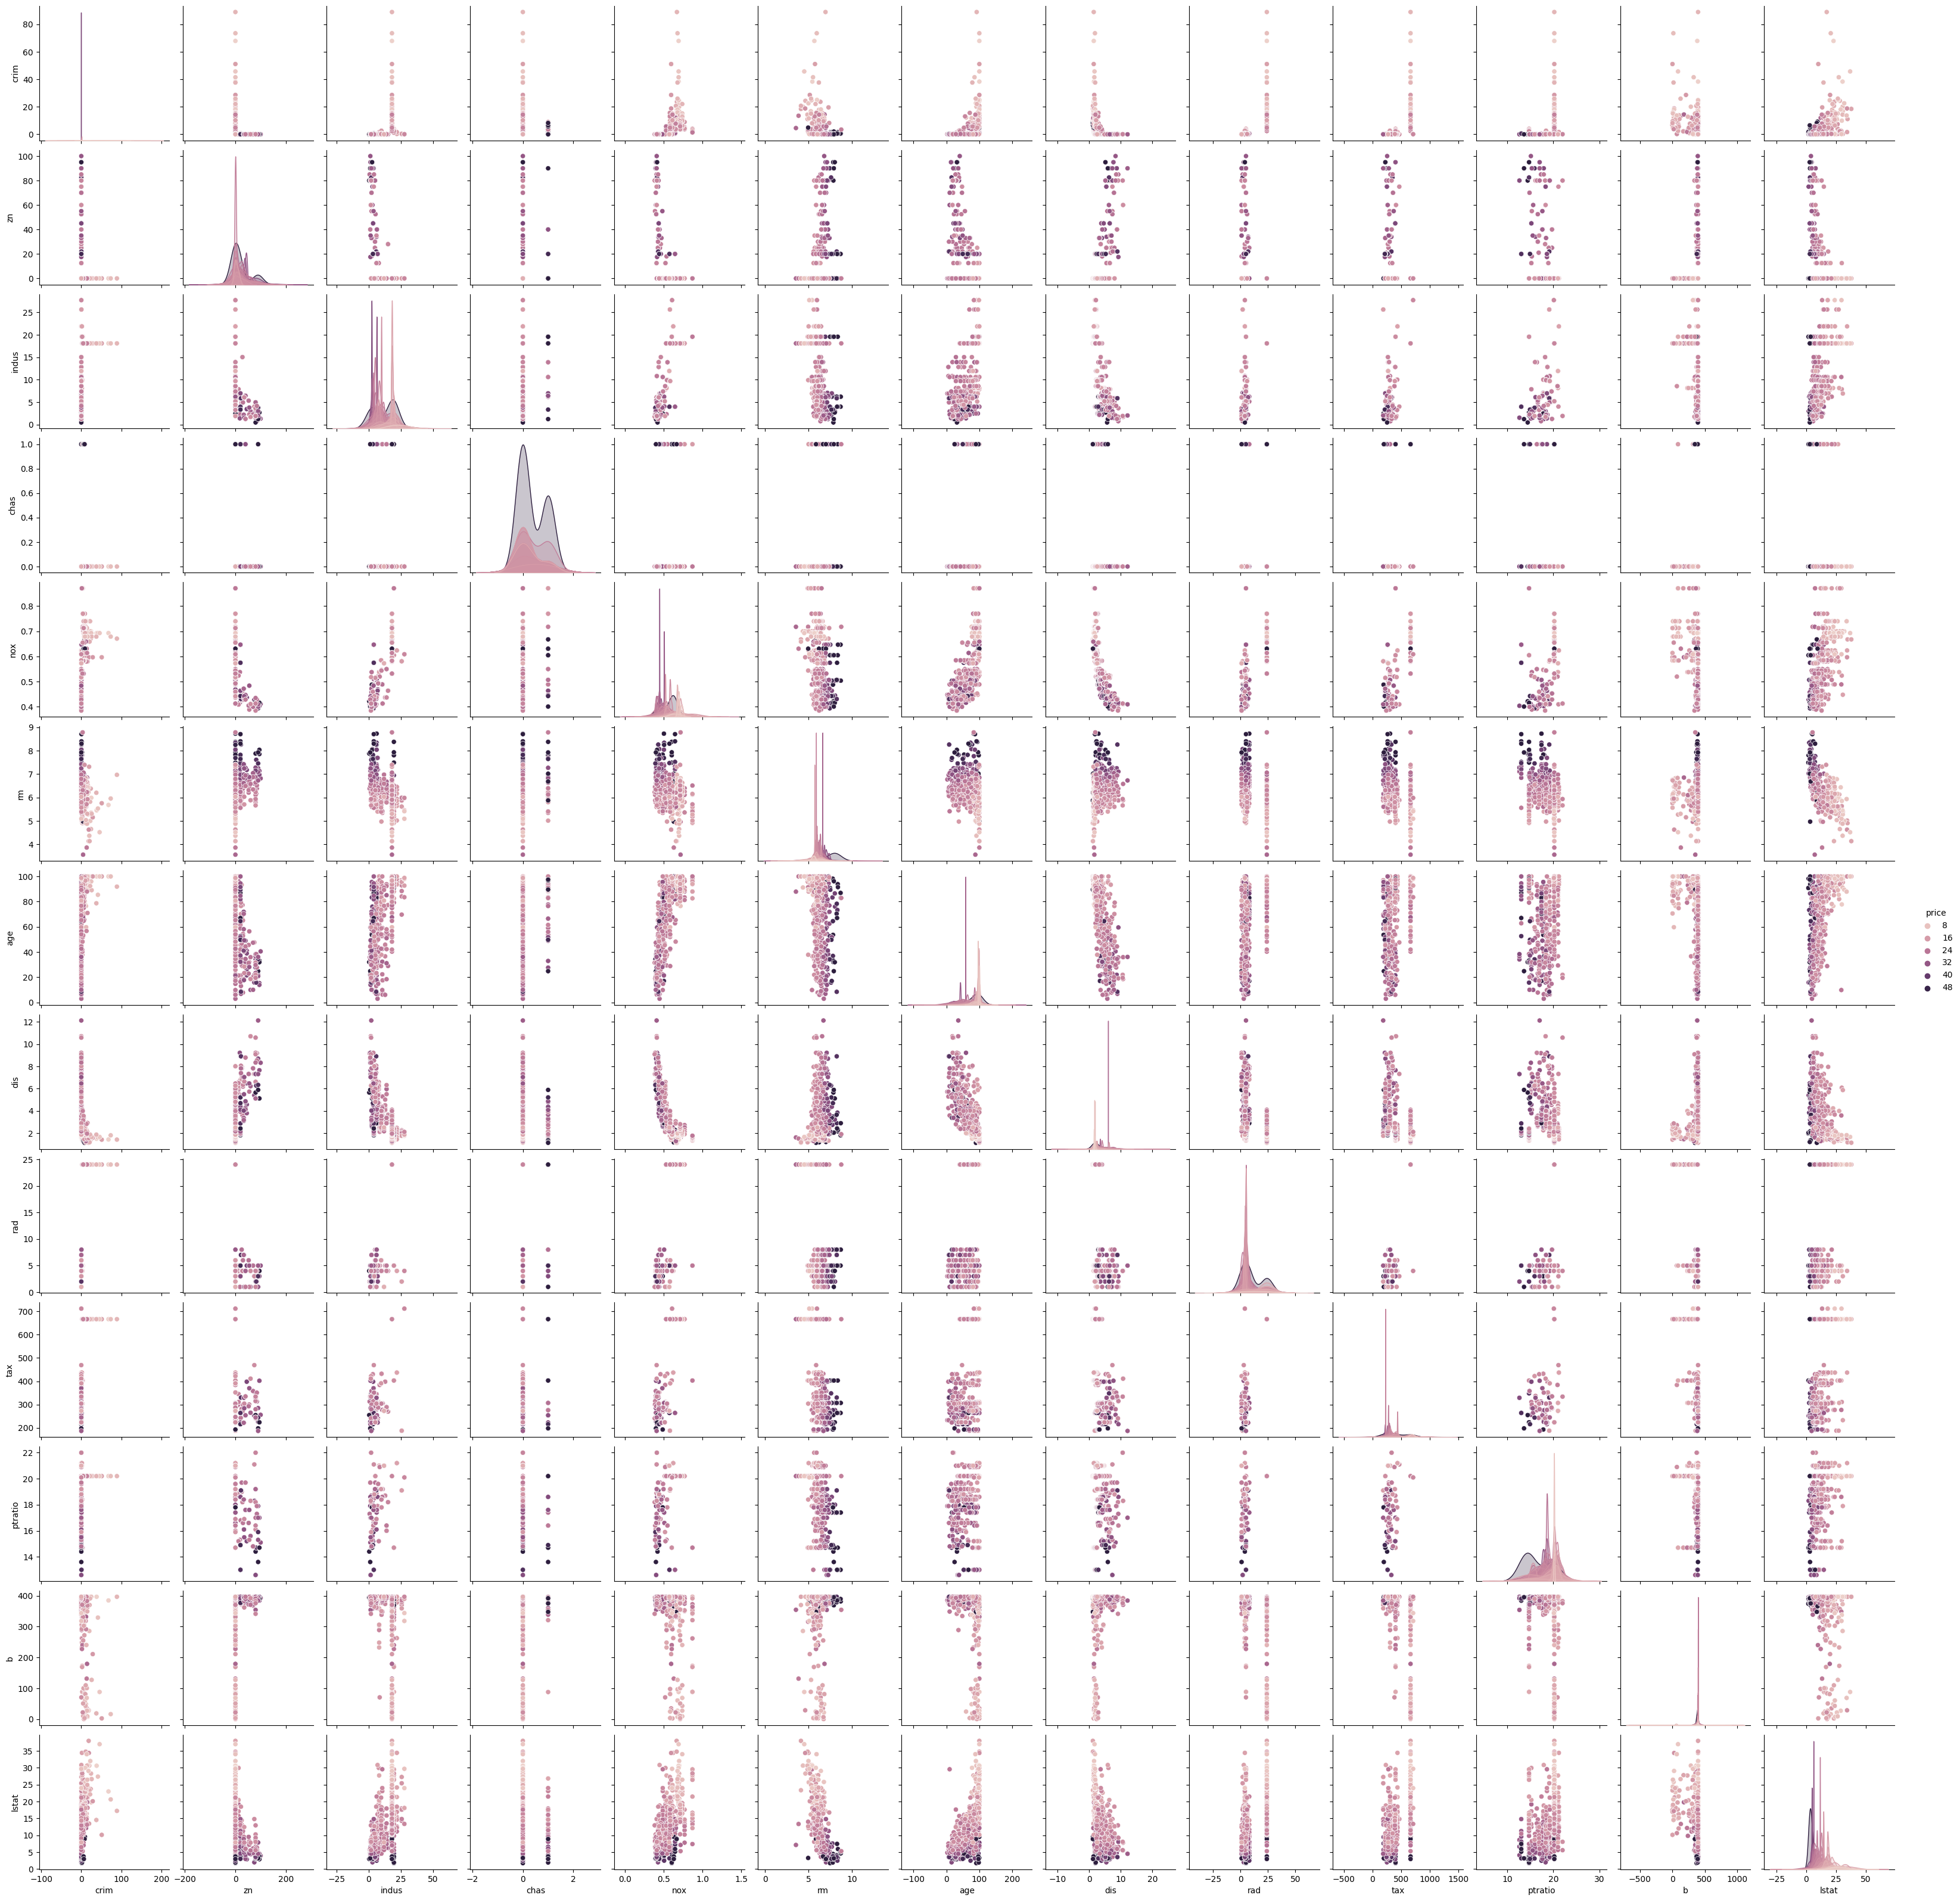

In [45]:
sns.pairplot(data, hue="price")

*mi aspetto correlazione inversa tra il campo "price" e i campi "crim" e "nox"*

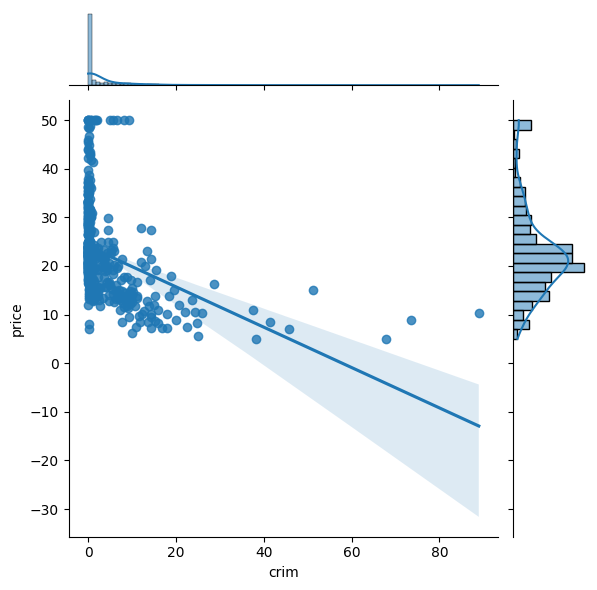

In [47]:
sns.jointplot(x=data["crim"], y=data["price"], kind="reg")

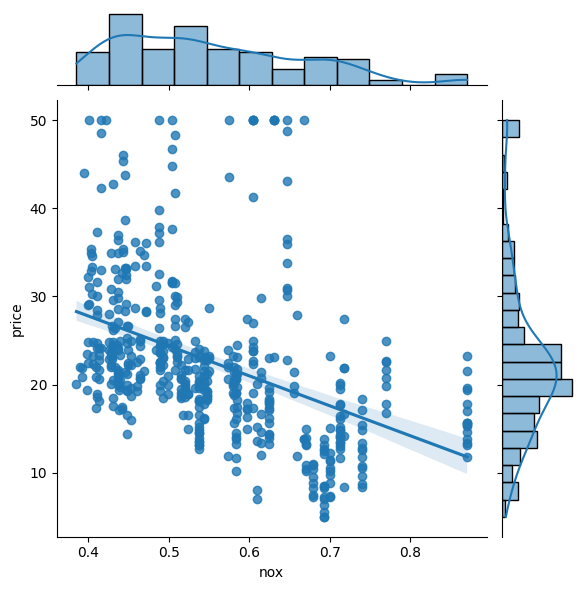

In [49]:
sns.jointplot(x=data["nox"], y=data["price"], kind="reg")

*correlazione diretta tra "price" e "rm"*

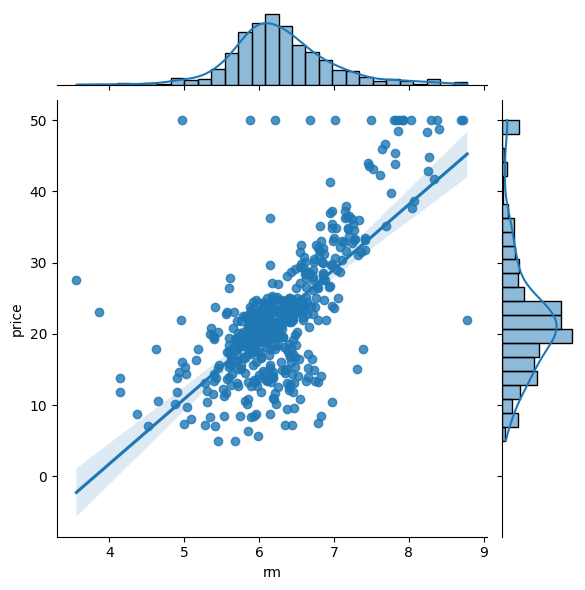

In [52]:
sns.jointplot(x=data["rm"], y=data["price"], kind="reg")

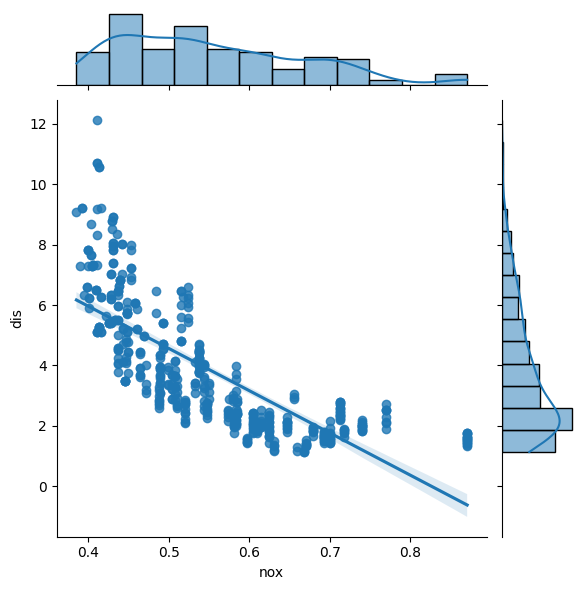

In [53]:
## non credo sia interessante per il modello
sns.jointplot(x=data["nox"], y=data["dis"], kind="reg")

*assomiglia a una sorta di esponenziale*

## Creazione del modello


In [63]:
X = data.drop(columns="price") # feature
y = data["price"] # target
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
X_train, y_train


(         crim    zn  indus  chas    nox     rm   age     dis   rad    tax  \
 478  10.23300   0.0  18.10   0.0  0.614  6.185  96.7  2.1705  24.0  666.0   
 26    0.67191   0.0   8.14   0.0  0.538  5.813  90.3  4.6820   4.0  307.0   
 7     0.14455  12.5   7.87   0.0  0.524  6.172  96.1  5.9505   5.0  311.0   
 492   0.11132   0.0  27.74   0.0  0.609  5.983  83.5  2.1099   4.0  711.0   
 108   0.12802   0.0   8.56   0.0  0.520  6.474  97.1  2.4329   5.0  384.0   
 ..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
 106   0.17120   0.0   8.56   0.0  0.520  5.836  91.9  2.2110   5.0  384.0   
 270   0.29916  20.0   6.96   0.0  0.464  5.856  42.1  4.4290   3.0  223.0   
 348   0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
 435  11.16040   0.0  18.10   0.0  0.740  6.629  94.6  2.1247  24.0  666.0   
 102   0.22876   0.0   8.56   0.0  0.520  6.405  85.4  2.7147   5.0  384.0   
 
      ptratio       b  lstat  
 478     20.2  379.70  18.03  


In [68]:
X_test, y_test

(        crim    zn  indus  chas    nox     rm   age     dis   rad    tax  \
 173  0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   
 274  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
 491  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
 72   0.09164   0.0  10.81   0.0  0.413  6.065   7.8  5.2873   4.0  305.0   
 452  5.09017   0.0  18.10   0.0  0.713  6.297  91.8  2.3682  24.0  666.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
 110  0.10793   0.0   8.56   0.0  0.520  6.195  54.4  2.7778   5.0  384.0   
 321  0.18159   0.0   7.38   0.0  0.493  6.376  54.3  4.5404   5.0  287.0   
 265  0.76162  20.0   3.97   0.0  0.647  5.560  62.8  1.9865   5.0  264.0   
 29   1.00245   0.0   8.14   0.0  0.538  6.674  87.3  4.2390   4.0  307.0   
 262  0.52014  20.0   3.97   0.0  0.647  8.398  91.5  2.2885   5.0  264.0   
 
      ptratio       b  lstat  
 173     16.6  395.50   9.04  
 274     17.

In [90]:
price_model = LinearRegression(fit_intercept=True)
price_model.fit(X_train, y_train)
coeff = price_model.coef_

eq_mod = f"{round(price_model.intercept_,2)} "

for c in range(coeff.size):
    beta = round(coeff[c], 2)
    col = data.columns[c]
    eq_mod += f" + {beta} * {col}"


eq_mod


'33.33  + -0.13 * crim + 0.04 * zn + 0.06 * indus + 3.24 * chas + -16.17 * nox + 3.9 * rm + -0.01 * age + -1.42 * dis + 0.23 * rad + -0.01 * tax + -0.93 * ptratio + 0.01 * b + -0.55 * lstat'

## Inference 

<Axes: >

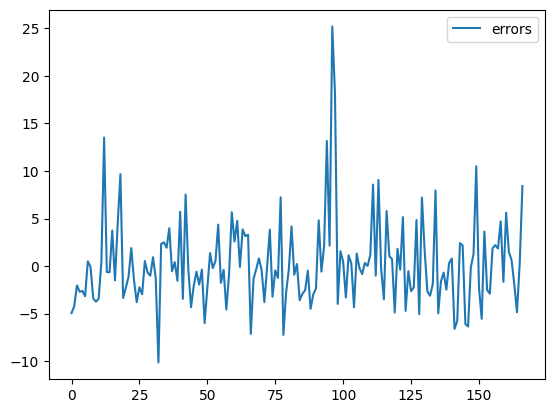

In [114]:
y_pred = price_model.predict(X_test)
#print(y_pred, y_test.to_numpy())
y_arr = y_test.to_numpy()
err = pd.DataFrame(y_test.to_numpy() - y_pred, columns=["errors"])
sns.lineplot(err)


<Axes: >

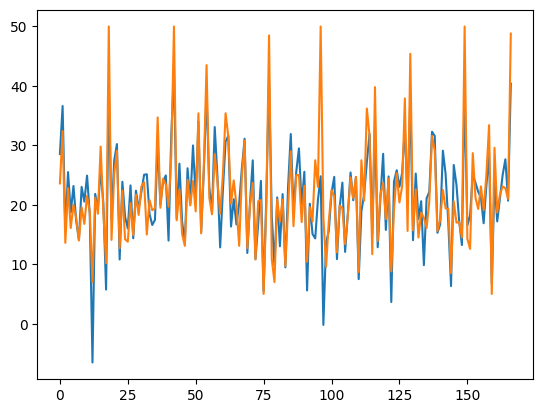

In [115]:
test = pd.DataFrame(y_test.to_numpy(), columns=["Test Set"])
pred = pd.DataFrame(y_pred, columns=["Prediction Set"])

sns.lineplot(y_pred)
sns.lineplot(y_arr)

## Errori del modello


In [123]:
# r2 
r2_score(y_test, y_pred)
mean_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
mean_squared_error(y_test, y_pred, squared=True)

20.724023437339635